In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Dataset Final Exam.csv', sep=',', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,121,22,74,223,54,254,132,17,77,232,50,249
1,108,30,80,175,40,300,123,32,79,192,64,315
2,122,49,87,266,41,223,129,31,96,250,55,319
3,77,37,66,178,80,209,131,23,67,291,48,310
4,140,35,71,175,38,261,110,24,96,239,42,268


In [7]:
df_array = df.values

### 1. Compute the eigen values and corresponding eigenvectors of covariance matrix of the data

Calculate the covariance matrix

In [11]:
cov_matrix = np.cov(df_array)

Compute the eigen values and corresponding eigenvetcors of covariance matrix

In [12]:
w, v = np.linalg.eig(cov_matrix)

So, the eigenvalues are `w`:

In [13]:
w

array([ 1.61144702e+05+0.0000000e+00j,  3.02150989e+03+0.0000000e+00j,
        1.70301341e+03+0.0000000e+00j,  1.24683741e+03+0.0000000e+00j,
        6.05961223e+02+0.0000000e+00j,  5.13606549e+02+0.0000000e+00j,
        4.33538836e+02+0.0000000e+00j,  2.79820250e+02+0.0000000e+00j,
        9.99169851e+01+0.0000000e+00j,  6.46542242e+01+0.0000000e+00j,
        4.72197353e+01+0.0000000e+00j,  7.05342510e-12+0.0000000e+00j,
       -3.87211306e-12+0.0000000e+00j, -2.56017107e-12+4.4252166e-13j,
       -2.56017107e-12-4.4252166e-13j,  2.66140327e-12+0.0000000e+00j,
        1.75829854e-12+0.0000000e+00j,  8.66221612e-13+0.0000000e+00j,
       -3.97552641e-13+8.9093833e-14j, -3.97552641e-13-8.9093833e-14j])

the eigenvectors are `v`:

In [15]:
v

array([[-0.22339532+0.j        , -0.19672347+0.j        ,
         0.02897941+0.j        ,  0.01785256+0.j        ,
         0.14341725+0.j        ,  0.23928671+0.j        ,
        -0.29034263+0.j        , -0.32665894+0.j        ,
         0.11154024+0.j        , -0.03818529+0.j        ,
         0.07299793+0.j        ,  0.58479252+0.j        ,
         0.06914614+0.j        ,  0.06562965+0.1794376j ,
         0.06562965-0.1794376j ,  0.07294149+0.j        ,
         0.04674205+0.j        , -0.09394113+0.j        ,
        -0.20001793-0.06927581j, -0.20001793+0.06927581j],
       [-0.2375551 +0.j        ,  0.03676923+0.j        ,
        -0.50511715+0.j        , -0.10069305+0.j        ,
        -0.29072141+0.j        ,  0.14892796+0.j        ,
         0.36782412+0.j        , -0.273773  +0.j        ,
        -0.2399054 +0.j        ,  0.18522274+0.j        ,
        -0.01664072+0.j        , -0.21057783+0.j        ,
         0.13630588+0.j        ,  0.02988464+0.12937947j,
         0.02

### 2. Find the proportion of the total variance explained by the componets

In [34]:
def show_proportion_of_total_variance(data):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    import matplotlib.pyplot as plt
    sc = StandardScaler()
    sc.fit(data)
    X_train_std = sc.transform(data)
    #
    # Instantiate PCA
    #
    pca = PCA()
    #
    # Determine transformed features
    #
    X_train_pca = pca.fit_transform(X_train_std)
    #
    # Determine explained variance using explained_variance_ration_ attribute
    #
    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    #
    # Create the visualization plot
    #
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    print(cum_sum_eigenvalues)

Class One

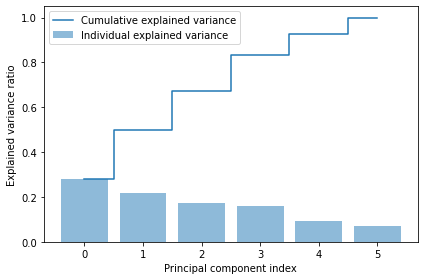

[0.28065052 0.50001345 0.67389854 0.83315606 0.92739607 1.        ]


In [35]:
show_proportion_of_total_variance(df_array[:,:6])

Class Two

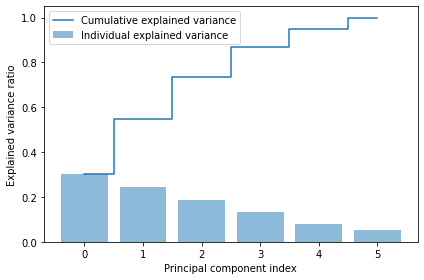

[0.3025184  0.5471895  0.73429941 0.86907317 0.94932685 1.        ]


In [36]:
show_proportion_of_total_variance(df_array[:,6:12])

### 3. How much of the total variance account of first two principal components

From the graph above:

For group one the total cumulative variance of the first two principal components is 0.50001345, and for group two, it is 0.5471895

### 4. Plot eigenvalues to visualize the proportion of variance explained by each subsequential eigenvalue

See the plot above...

### 5. Use PCA to transforms the data into a new set of variables (PCs).

In [42]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA()
PCs1 = pca.fit_transform(df_array[:,:6])

In [51]:
PCs1.shape

(20, 6)

In [62]:
# Show the first ten transformed dataset
PCs1[:10]

array([[ 2.95855406e+01,  1.04753398e+00, -4.43359660e+00,
        -8.45079931e+00,  4.75320892e-02,  1.54174710e+01],
       [-1.81949155e+01, -3.93707582e+01, -3.00355646e+01,
        -1.91765084e+01, -1.11702615e+01,  6.92929231e+00],
       [ 7.33590225e+01,  1.80561182e+01,  2.26865371e+00,
         2.55280398e+01, -1.18482170e+01, -2.79241192e+00],
       [-1.73078743e+01,  6.36302576e+01, -2.36981746e+01,
        -5.71272977e+00, -1.19577840e+00, -5.91896560e+00],
       [-1.63538209e+01, -2.15793445e+01,  3.80172637e+00,
         7.73820269e+00,  1.03899916e+01,  5.99788322e+00],
       [ 4.79477477e+01,  1.61066481e+01, -1.65991050e+01,
        -8.16642089e+00,  1.11677116e+01, -1.23526371e+00],
       [ 1.45888192e+00,  1.65109788e+01,  1.52143518e+00,
        -1.28063812e+01,  2.24243943e+01, -7.06842434e+00],
       [ 5.57689169e+00,  1.80258311e+01,  2.15045621e+01,
        -1.89776666e+01, -1.15200007e+01, -1.95812627e+00],
       [ 6.33592677e+00, -3.47624299e+01,  1.685

In [63]:
pca = PCA()
PCs2 = pca.fit_transform(df_array[:,6:12])

In [64]:
PCs2.shape

(20, 6)

In [65]:
# Show the first ten transformed dataset
PCs2[:10]

array([[ 2.57987568e+01, -4.44996417e-01, -1.36587030e+01,
         1.46937098e+01,  1.46387053e+01,  8.75623533e+00],
       [-2.05691979e+01,  4.97833007e+01,  2.50045904e+01,
         1.30672508e+01,  9.72814533e-01, -1.48479781e+00],
       [-3.57185310e+01, -7.59731771e+00,  1.99682674e+01,
         3.89541223e+00, -1.12608034e+01,  9.26376967e-01],
       [-3.80795840e+01, -4.68440883e+01,  1.44431891e+01,
         7.47341690e-01,  2.24085124e+01,  6.88124030e-01],
       [ 2.01706192e+01, -7.22063755e+00,  1.12826372e+01,
        -1.62821365e+00, -5.32677627e+00,  6.93451440e+00],
       [ 9.42216922e+01, -1.15579932e+01,  4.24446586e+01,
        -5.40734636e+00,  8.31219725e+00, -8.33845688e-02],
       [-3.27328458e+01,  1.59619735e+01,  2.06471902e+01,
        -2.06716231e+01, -2.60369028e+00,  6.76587287e+00],
       [-1.60668186e+01,  4.25459049e+00,  1.19255363e+01,
         1.03632796e+01, -1.64871753e+01,  3.27343404e+00],
       [ 5.31503747e+00, -2.24090026e+01, -2.136

### 6. Find and plot top first 2 PCs

Group One

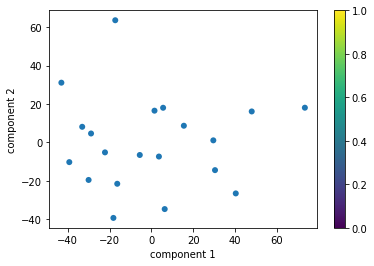

In [69]:
import matplotlib.pyplot as plt

plt.scatter(PCs1[:, 0], PCs1[:, 1], edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Group Two

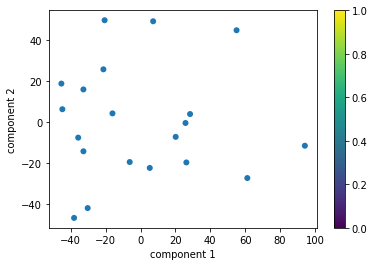

In [68]:
import matplotlib.pyplot as plt

plt.scatter(PCs2[:, 0], PCs2[:, 1],edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 7. Calculate the correlation between the original data and the component. Interpreted based which variable they are most correlated in either a positive or negative direction

In [77]:
from scipy.stats.stats import pearsonr   

Group One, the first column is the correlation, while the second column is the p-value of it

In [78]:
for i in range(0,6):
    print(pearsonr(df_array[:,i],PCs1[:,i]))

(0.06443976579649642, 0.7872312944499033)
(-0.23561348797700016, 0.3173008531423038)
(0.48627097053316576, 0.029705481882213156)
(-0.0199265233478159, 0.9335462703764398)
(-0.029205019669966647, 0.9027212706909494)
(-0.023247303429626366, 0.9225012869007734)


Group Two, the first column is the correlation, while the second column is the p-value of it

In [80]:
for i in range(0,6):
    print(pearsonr(df_array[:,6+i],PCs2[:,i]))

(-0.6967817622764083, 0.0006410022205784092)
(0.3171408130009202, 0.1730547124932433)
(-0.04261720113097531, 0.8584101937933257)
(-0.008883966504801565, 0.9703473814209748)
(-0.05857956480843332, 0.8062106147959324)
(0.009756211602223001, 0.9674374413498783)
